# Conduction stationnaire unidimensionnelle sur un domaine non aligné avec les axes du repère

In [1]:
from trustutils import run

run.introduction("D. Jamet")

## Introduction 
 Validation made by : D. Jamet



 Report generated 25/01/2022

### Description

On considère un problème de conduction thermique stationnaire unidimensionnel simple.  Afin de tester le  codage  en  trois  dimensions,  ce  problème  est  résolu  sur  un  parallélépipède  rectangles  dont  les  axes principaux ne sont pas alignés avec les axes du repère.  La solution numérique du problème est comparée à sa solution analytique.  Le calcul est fait en trois dimension bien que le problème soit unidimensionne la fin de détecter des erreurs éventuelles de codage.

In [2]:
run.TRUST_parameters()

### TRUST parameters 
 * Version TRUST: 1.8.4
 * Binary used: /volatile/catA/ll258196/trust-code/exec/TRUST_mpi_opt (built on TRUST /volatile/catA/ll258196/trust-code/Validation/Rapports_automatiques/jupyter/EF/EF_Conduction_diagonale/build)

In [3]:
from trustutils import run 
import os
c1 = run.addCase(".","conduction_diagonale.data")
run.printCases()
run.runCases()

### Test cases 
* ./conduction_diagonale.data : 


Running **with Sserver**...
  => A total of 1 cases were (successfully) run in 0.3s.


## Champ de température calculé
On compare les champs de température calculé par GENEPI et analytique. Cette comparaison se fait sur le champ de température tridimensionnel.
### Champ calculé
On trace le champ calculé par GENEPI.

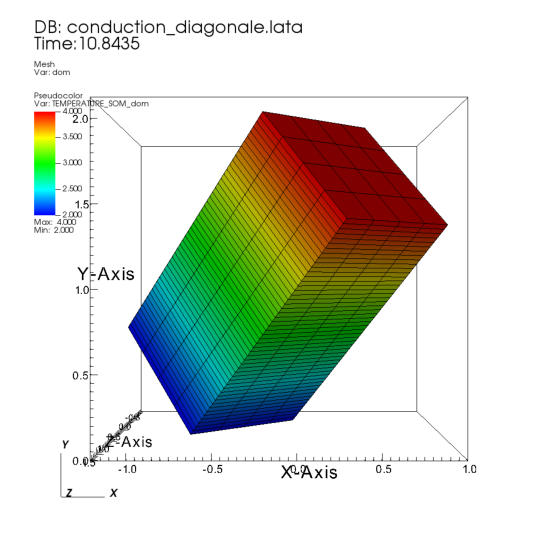

In [4]:
from trustutils import visit
visit.showField("./conduction_diagonale.lata","Pseudocolor","TEMPERATURE_SOM_dom")

### Comparaison des champs calculé et analytique

On trace la différence entre le champ calculé par GENEPI et le champ analytique.

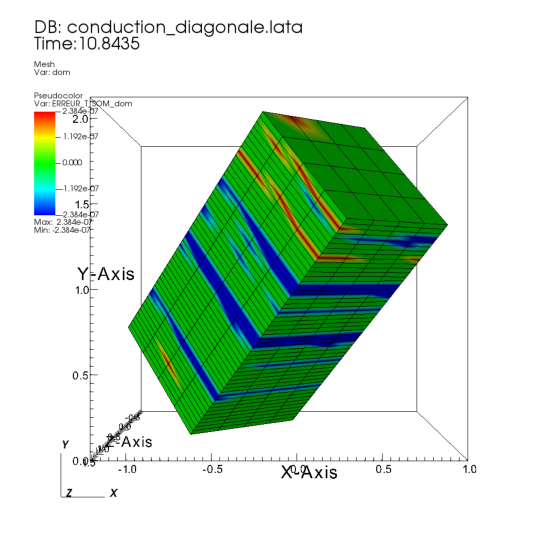

In [5]:
from trustutils import visit
Graph=visit.Show("./conduction_diagonale.lata","Mesh","dom",plotmesh=False)
Graph.visitCommand("DefineScalarExpression(\"ERREUR_T_SOM_dom\",\"TEMPERATURE_SOM_dom-(coord(dom)[0]/2.0+sqrt(2.0)*coord(dom)[1]/2.0+coord(dom)[2]/2.0+2.0)\") ")
Graph.addField("./conduction_diagonale.lata","Pseudocolor","ERREUR_T_SOM_dom")
Graph.plot()

## Data Files
### conduction_diagonale

In [6]:
from trustutils import run

run.dumpData("./conduction_diagonale.data")

 # Conduction 3D #
 # Temperature imposee en entree et en sortie #
 # Paroi du haut adiabatique et paroi du bas symetrie #
 
 # PARALLEL OK 8 #
 dimension 3
 
 Pb_conduction pb
 Domaine dom
 # BEGIN MESH #
 Mailler dom
 {
 	 Pave Cavite 
  	 {
 	 	 Origine 0. 0. 0.
 	 	 Nombre_de_Noeuds 51 5 5 
 	 	 Longueurs 2. 1. 1.
 	 }
 	 {
 	 	 Bord Devant    X = 2. 0. <= Y <= 1. 0. <= Z <= 1.
 	 	 Bord Derriere  X = 0. 0. <= Y <= 1. 0. <= Z <= 1.
 	 	 Bord Droit     Y = 1. 0. <= X <= 2. 0. <= Z <= 1.
 	 	 Bord Gauche    Y = 0. 0. <= X <= 2. 0. <= Z <= 1.
 	 	 Bord Bas       Z = 0. 0. <= X <= 2. 0. <= Y <= 1.
 	 	 Bord Haut      Z = 1. 0. <= X <= 2. 0. <= Y <= 1.
 	 }
 } 
 
 
 transformer dom (x/2.0-y/2.0-sqrt(2.0)*z/2.0) (sqrt(2.0)*x/2.0+sqrt(2.0)*y/2.0) (x/2.0-y/2.0+sqrt(2.0)*z/2.0)
 
 # END MESH #
 # BEGIN PARTITION
 Partition dom
 {
 	 Partition_tool tranche { tranches 2 1 1 }
 	 Larg_joint 1
 	 zones_name DOM
 }
 End
 END PARTITION #
 
 # BEGIN SCATTER
 Scatter DOM.Zones dom
 END SCATTER #
 
